In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
pd.options.mode.chained_assignment = None

In [2]:
# MACD oscillator: Compute long term moving average and short term moving average on the close price of a given stock
# when short term moving average is above long term moving average, we long the given stock accordingly, vice versa
# so we first create the short and long term moving averages, appending back to signals

def macd(signals):
    signals['ma1']=signals['Close'].rolling(window=ma1,min_periods=1,center=False).mean()
    signals['ma2']=signals['Close'].rolling(window=ma2,min_periods=1,center=False).mean()
    return signals

In [3]:
# when short moving avg > long moving avg, we hold
# when short moving avg < long moving avg, we clear
# logic is that momentum has more impact on short moving avg
# then subtract short moving avg from long moving avg
# the difference is sometimes positive, and sometimes negative, hence called the moving average 
# converge/diverge oscillator
def signal_generation(df,method):
    signals=method(df)
    signals['position']=0

    # positions becomes and stays one once the short moving avg is above long moving avg
    signals['position'][ma1:]=np.where(signals['ma1'][ma1:]>=signals['ma2'][ma1:],1,0)

    # because positions only imply the holding, we take the difference to generate real trading signals
    signals['signals']=signals['position'].diff()

    # oscillator is the difference between the moving averages
    signals['oscillator']=signals['ma1']-signals['ma2']

    return signals

    

In [4]:
# plotting the backtesting result
def plot(new, ticker):

    # the first plot is the actual close price with long/short positions
    # we want a single subplot in a grid with 1 row and 1 column, and we want the subplot to be placed in 
    # the first (and only) position
    fig=plt.figure()
    ax=fig.add_subplot(111)

    # plot the close price on the graph
    new['Close'].plot(label=ticker)

    # plot the signals on the graph, using lw=0 to ensure only the markers are drawn with no line
    ax.plot(new.loc[new['signals']==1].index,new['Close'][new['signals']==1],label='LONG',lw=0,marker='^',c='g')
    ax.plot(new.loc[new['signals']==-1].index,new['Close'][new['signals']==-1],label='SHORT',lw=0,marker='v',c='r')

    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Positions')    
    plt.show()

    # the second plot is long/short moving average with oscillator, as a bar chart
    fig=plt.figure()
    cx=fig.add_subplot(211)

    new['oscillator'].plot(kind='bar',color='r')

    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([])
    plt.xlabel('')
    plt.title('MACD Oscillator')

    bx=fig.add_subplot(212)

    new['ma1'].plot(label='ma1')
    new['ma2'].plot(label='ma2',linestyle=':')

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [5]:
def main():

    # input the long moving avg and short moving avg period (default to 10 and 21)
    # remember that entry signal is always late
    
    global ma1,ma2,stdate,eddate,ticker

    ma1=int(input('ma1:'))
    ma2=int(input('ma2:'))
    stdate=input('start date in format yyyy-mm-dd:')
    eddate=input('end date in format yyyy-mm-dd:')
    ticker=input('ticker:')

    # downloading data
    df=yf.download(ticker,start=stdate,end=eddate)

    new=signal_generation(df,macd)
    plot(new,ticker)

ma1: 10
ma2: 21
start date in format yyyy-mm-dd: 2023-02-01
end date in format yyyy-mm-dd: 2023-05-30
ticker: TSLA


[*********************100%%**********************]  1 of 1 completed


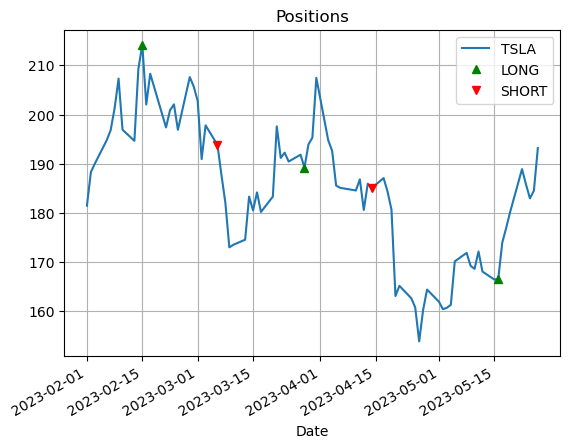

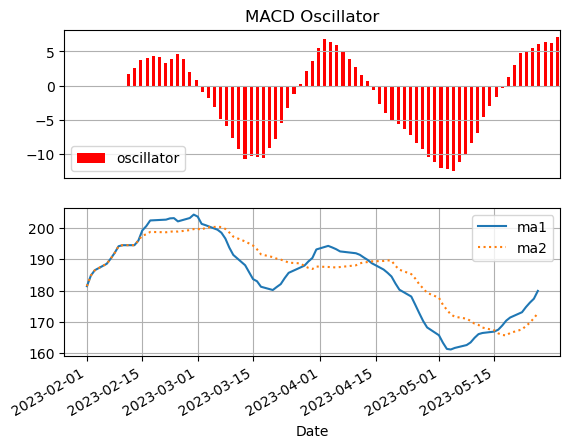

In [6]:
# as an example, 
# ma1:10 and ma2:21
# 2023-01-01 to 2023-06-30
# TSLA

if __name__ == '__main__':
    main()